In [56]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import warnings

from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split


In [57]:
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (16, 10)})

In [58]:
data = pd.read_csv("data.csv")
data
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']
y

0         False
1         False
2          True
3         False
4          True
          ...  
129875    False
129876     True
129877    False
129878     True
129879    False
Name: satisfaction, Length: 129880, dtype: bool

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = pd.get_dummies(y_train, drop_first=True).astype(int)
X_y_train
# y_train
# X_train, X_val, y_train, y_val = train_test_split(X_train)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,y
2049,Male,Loyal Customer,41,Business travel,Eco,187,3,2,2,2,...,3,3,3,2,4,3,3,1,4.0,0
49176,Male,disloyal Customer,14,Business travel,Eco,1310,1,1,1,3,...,1,4,1,1,3,2,4,11,9.0,0
38346,Female,Loyal Customer,43,Business travel,Business,925,5,5,5,5,...,5,4,4,4,4,4,5,48,30.0,1
36699,Male,Loyal Customer,50,Business travel,Eco,925,3,4,4,4,...,3,3,3,3,3,1,3,0,0.0,0
20521,Female,Loyal Customer,55,Personal Travel,Eco,460,3,2,3,3,...,3,3,3,3,3,1,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,Male,Loyal Customer,50,Business travel,Business,1428,3,5,3,3,...,5,5,5,5,5,2,2,0,0.0,1
117952,Male,Loyal Customer,19,Business travel,Business,946,3,3,3,3,...,5,5,5,2,5,4,5,0,8.0,1
42613,Male,Loyal Customer,19,Personal Travel,Eco,493,5,5,5,1,...,3,3,4,5,4,3,3,0,0.0,1
43567,Female,Loyal Customer,69,Personal Travel,Eco,925,2,5,2,3,...,4,5,5,2,5,4,5,0,0.0,0


In [69]:
data.groupby('satisfaction', as_index=False).agg({'Gender': 'count'})

,satisfaction,Gender
0,False,73452
1,True,56428


In [70]:
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
y                                    False
dtype: bool

In [71]:
X_y_train[X_y_train['Arrival Delay in Minutes'].isna()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,y
107098,Male,Loyal Customer,29,Business travel,Business,3772,5,5,5,5,...,5,5,3,3,5,3,5,0,NaN,1
84637,Male,Loyal Customer,23,Personal Travel,Eco,2704,1,1,1,3,...,2,2,1,3,4,4,2,0,NaN,0
115591,Female,Loyal Customer,53,Business travel,Business,813,5,5,1,5,...,5,2,2,2,2,5,3,41,NaN,1
87261,Male,Loyal Customer,60,Personal Travel,Eco,618,3,4,3,2,...,1,4,4,3,5,3,4,5,NaN,0
117195,Female,Loyal Customer,59,Business travel,Eco,547,4,1,1,1,...,3,4,4,4,4,4,4,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79013,Female,Loyal Customer,17,Personal Travel,Eco,224,4,5,4,2,...,1,2,4,3,5,4,2,11,NaN,0
99814,Male,Loyal Customer,35,Business travel,Business,2658,1,1,1,1,...,4,4,4,4,4,5,3,29,NaN,1
9481,Female,Loyal Customer,44,Business travel,Business,678,1,1,1,1,...,5,3,3,3,3,5,4,0,NaN,1
16881,Male,Loyal Customer,18,Personal Travel,Eco Plus,1576,4,5,4,3,...,4,4,4,5,5,3,4,55,NaN,1


In [72]:
X_y_train['Arrival Delay in Minutes'] = X_y_train['Arrival Delay in Minutes'].fillna(X_y_train['Arrival Delay in Minutes'].mode()[0])
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
y                                    False
dtype: bool

<Axes: >

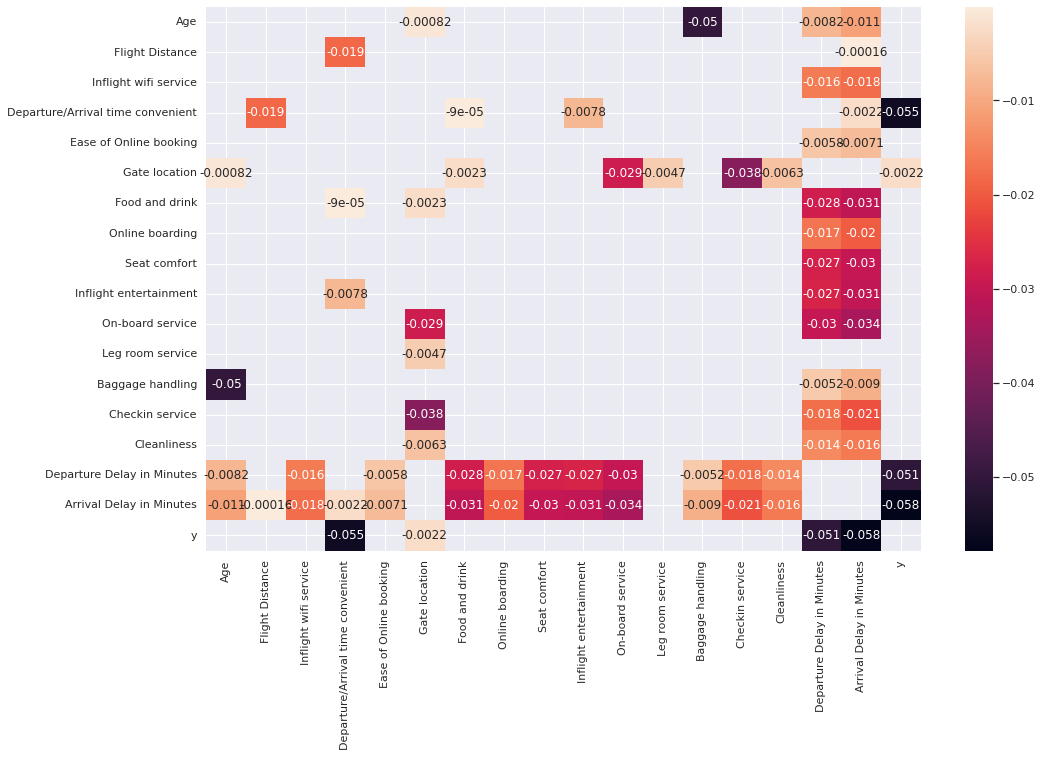

In [100]:
numeric_data = X_y_train.select_dtypes(include='number')
corr =  numeric_data.corr()
corr = corr[corr < -0.0]
sns.heatmap(corr, annot=True)

In [102]:
X_train.select_dtypes(exclude='number').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [ ]:
relevant_columns = ['Online boarding', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 'Flight distance', 'Inflight wifi service', 'Baggage handling', 'Checkin service', 'Food and drink']